In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('ggplot')

In [2]:
from PIL import Image
import cv2
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

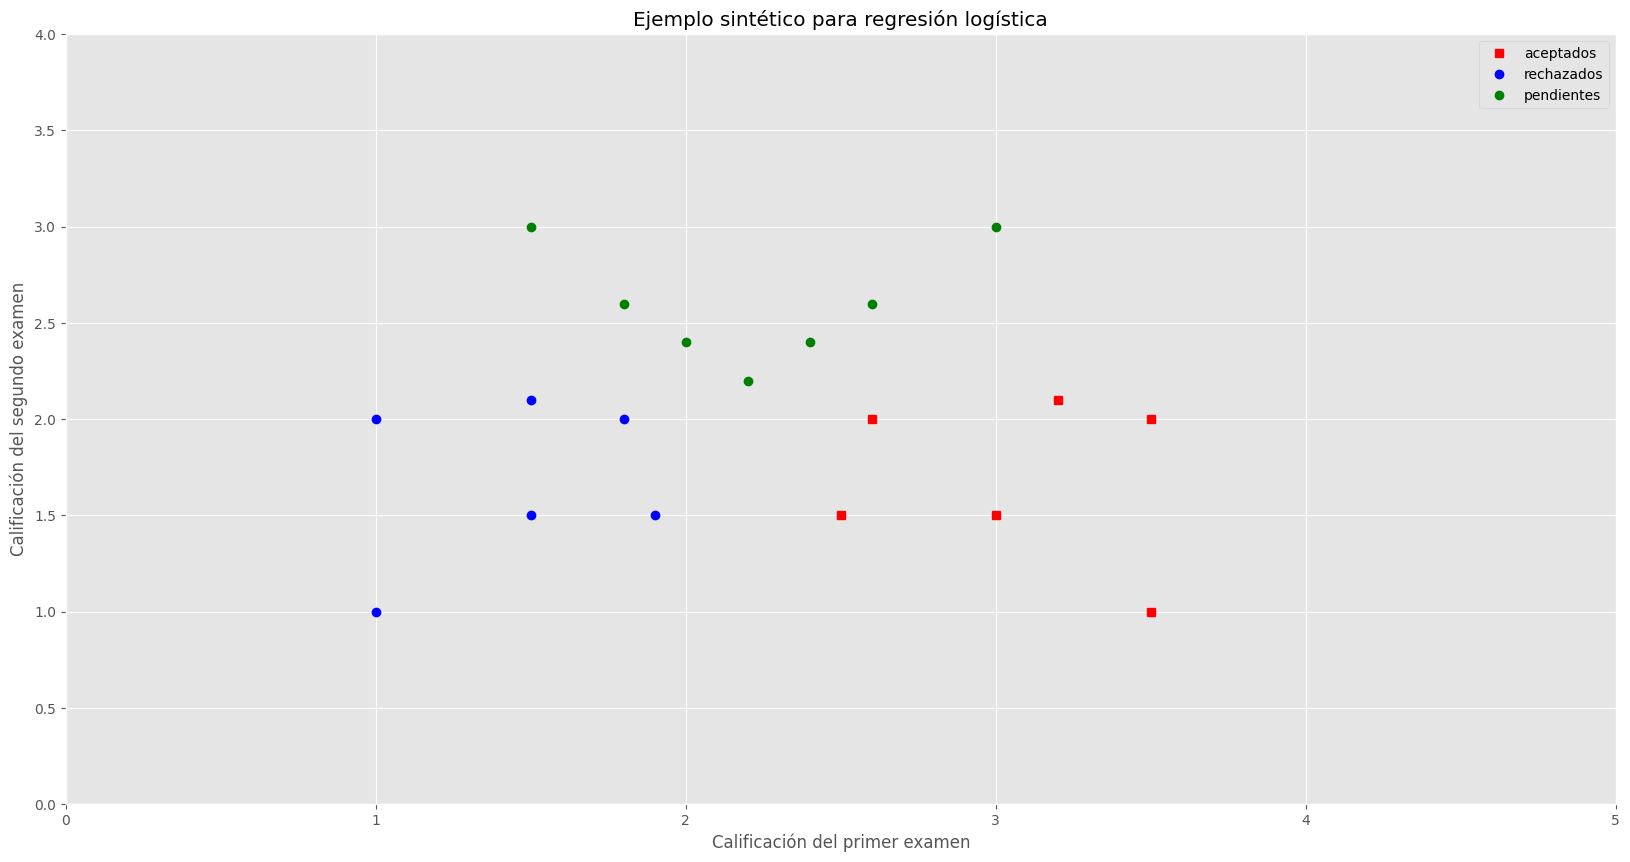

In [57]:
# Datos de entrada

x = np.array([[1, 1], [1.8, 2], [1.5, 1.5], [1, 2], [1.9, 1.5], [2.5, 1.5],[3.5, 1], [3, 1.5], [2.6, 2], [3.5, 2], [2.2, 2.2], [2, 2.4], [2.4, 2.4], [2.6, 2.6], [1.8, 2.6], [1.5, 3], [3, 3], [3.2, 2.1], [1.5, 2.1]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0])

plt.plot(x[y == 1, 0], x[y == 1, 1], 'sr', label='aceptados')
plt.plot(x[y == 0, 0], x[y == 0, 1], 'ob', label='rechazados')
plt.plot(x[y == 2, 0], x[y == 2, 1], 'go', label='pendientes')
plt.title(u'Ejemplo sintético para regresión logística')
plt.xlabel(u'Calificación del primer examen')
plt.ylabel(u'Calificación del segundo examen')
plt.axis([0, 5, 0, 4])
plt.legend(loc=0)
plt.show()

In [58]:
def logistica(z):
    """
    Calcula la función logística para cada elemento de z

    @param z: un ndarray
    @return: un ndarray de las mismas dimensiones que z
    """
    # Introduce código aqui (una linea de código)
    logistica= 1 / (1 + np.exp(-z))

    return logistica

def E_in(x, a, w, b):
    """
    Calcula E_in para el conjunto dee entrenamiento dado por y y x
    y los parametros w y b de la regresión logística

    @param x: un ndarray de dimensión (M, n) con la matriz de diseño
    @param a: un ndarray de dimensión (M, ) donde cada entrada es 1.0 o 0.0
    @param w: un ndarray de dimensión (n, ) con los pesos
    @param b: un flotante con el sesgo

    @return: un flotante con el valor de pérdida

    """
    M = x.shape[0]

    # Agrega aqui tu código
    z = np.dot(x, w) + b
    hat_a = logistica(z)
    error_en_muestra = -1/M * np.sum(a * np.log(hat_a) + (1 - a) * np.log(1 - hat_a))

    return error_en_muestra

def gradiente(x, a, w, b):
    """
    Calcula el gradiente de la función de error,
    utilizando una neurona logística, para w y b y conociendo un conjunto de aprendizaje.

    @param x: un ndarray de dimensión (M, n) con la matriz de diseño
    @param a: un ndarray de dimensión (M, ) donde cada entrada es 1.0 o 0.0
    @param w: un ndarray de dimensión (n, ) con los pesos
    @param b: un flotante con el sesgo

    @return: dw, db, un ndarray de mismas dimensiones que w y un flotnte con el cálculo de
             la dervada evluada en el punto w y b

    """
    M = x.shape[0]

    # Agregua aqui tu código
    z = np.dot(x, w) + b
    hat_a = logistica(z)

    dw = - 1/M * np.dot(x.T, (a - hat_a))
    db = - 1/M * np.sum(a - hat_a)

    return dw, db


def descenso_rl_lotes(x, a, nu, max_iter=int(1e4), historial=False):
    """
    Descenso de gradiente por lotes para resolver el problema de regresión logística con un conjunto de aprendizaje

    @param x: un ndarray de dimensión (M, n) con la matriz de diseño
    @param a: un ndarray de dimensión (M, ) donde cada entrada es 1.0 o 0.0
    @param nu: Un flotante (típicamente pequeño) con la tasa de aprendizaje
    @param max_iter: Máximo numero de iteraciones. Por default 1e4
    @param historial: Un booleano para saber si guardamos el historial del error o no

    @return: w, b, error_hist donde w es ndarray de dimensión (n, ) con los pesos; el flotante b
             con el sesgo y error_hist, un ndarray de dimensión (max_iter,) con el error en muestra
             en cada iteración. Si historial == False, entonces error_hist = None.

    """
    M, n = x.shape

    w = np.random.rand(n)
    min_value = -100.0  # Minimum value for 'b'
    max_value = 100.0  # Maximum value for 'b'
    b = np.random.uniform(min_value, max_value)

    if historial:
        error_hist = np.zeros(max_iter)
        error_hist[0] = None
    else:
        error_hist = None

    contador = 0
    for epoch in range(1, max_iter):
        # Agregar aqui tu código
        #
        # Recuerda utilizar las funciones que ya has desarrollado
        dw, db = gradiente(x, a, w, b)

        nu_estocastico = 1 / np.sqrt(epoch + 1) * nu

        w -= nu * dw
        b -= nu * db

        if historial:
            error_hist[epoch] = (-1.0 / M) * np.sum(y * np.log(logistica(np.dot(x,w)+b)) + (1 - y) * np.log(1 - logistica(np.dot(x,w)+b)))
    return w, b, error_hist

In [59]:
y_0vs12 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])
y_1vs02 = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])
y_2vs01 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

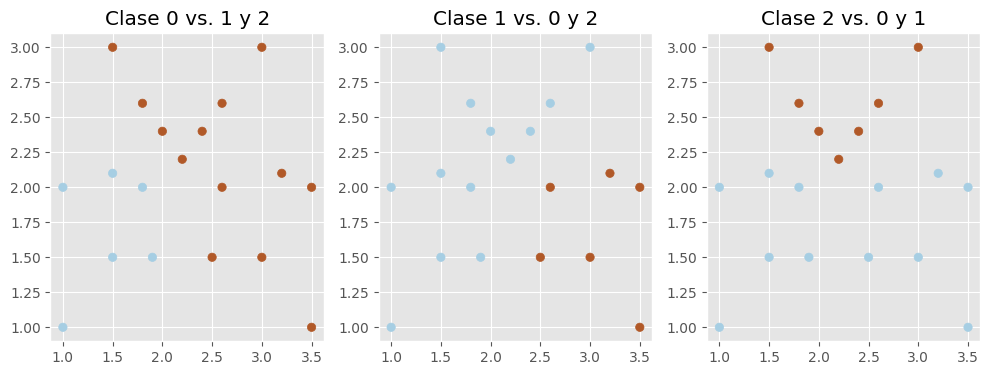

In [61]:
def train_one_vs_rest(x, y):
    w, b, _ = descenso_rl_lotes(x, y, nu=0.01, max_iter=100000, historial=False)
    return w, b

# Entrenar los tres modelos One-vs-Rest
w_0, b_0 = train_one_vs_rest(x, y_0vs12)
w_1, b_1 = train_one_vs_rest(x, y_1vs02)
w_2, b_2 = train_one_vs_rest(x, y_2vs01)

def predict_one_vs_rest(x, w, b):
    z = np.dot(x, w) + b
    y_pred = logistica(z)
    return y_pred

# Realizar predicciones para cada clase
y_pred_0 = predict_one_vs_rest(x, w_0, b_0)
y_pred_1 = predict_one_vs_rest(x, w_1, b_1)
y_pred_2 = predict_one_vs_rest(x, w_2, b_2)

# Función para trazar la frontera de decisión de un clasificador
def plot_decision_boundary(w, b, color, label):
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = predict_one_vs_rest(np.c_[xx.ravel(), yy.ravel()], w, b)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors=color, linewidths=1, levels=[0.5])
    plt.xlabel('Calificación del primer examen')
    plt.ylabel('Calificación del segundo examen')
    plt.title(label)

# Graficar las fronteras de decisión de los tres clasificadores
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(x[:, 0], x[:, 1], c=y_0vs12, cmap=plt.cm.Paired)
plot_decision_boundary(w_0, b_0, 'r', 'Clase 0 vs. 1 y 2')

plt.subplot(132)
plt.scatter(x[:, 0], x[:, 1], c=y_1vs02, cmap=plt.cm.Paired)
plot_decision_boundary(w_1, b_1, 'g', 'Clase 1 vs. 0 y 2')

plt.subplot(133)
plt.scatter(x[:, 0], x[:, 1], c=y_2vs01, cmap=plt.cm.Paired)
plot_decision_boundary(w_2, b_2, 'b', 'Clase 2 vs. 0 y 1')

plt.tight_layout()
plt.show()

Predicción para el primer nuevo punto (Clase combinada): [0]
Predicción para el segundo nuevo punto (Clase combinada): [1]
Predicción para el tercer nuevo punto (Clase combinada): [2]


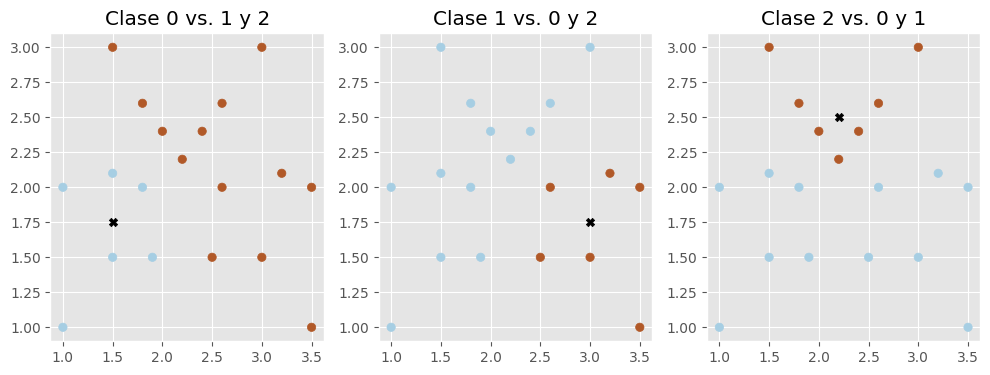

In [69]:
# Nuevos puntos a predecir
nuevos_puntos = [np.array([[1.5, 1.75]]), np.array([[3, 1.75]]), np.array([[2.2, 2.5]])]

# Predicciones para el primer nuevo punto
prediccion_clase_0_p1 = predict_one_vs_rest(nuevos_puntos[0], w_0, b_0)
prediccion_clase_1_p1 = predict_one_vs_rest(nuevos_puntos[0], w_1, b_1)
prediccion_clase_2_p1 = predict_one_vs_rest(nuevos_puntos[0], w_2, b_2)

# Predicciones para el segundo nuevo punto
prediccion_clase_0_p2 = predict_one_vs_rest(nuevos_puntos[1], w_0, b_0)
prediccion_clase_1_p2 = predict_one_vs_rest(nuevos_puntos[1], w_1, b_1)
prediccion_clase_2_p2 = predict_one_vs_rest(nuevos_puntos[1], w_2, b_2)

# Predicciones para el tercer nuevo punto
prediccion_clase_0_p3 = predict_one_vs_rest(nuevos_puntos[2], w_0, b_0)
prediccion_clase_1_p3 = predict_one_vs_rest(nuevos_puntos[2], w_1, b_1)
prediccion_clase_2_p3 = predict_one_vs_rest(nuevos_puntos[2], w_2, b_2)

# Combinar las predicciones de los tres clasificadores mediante votación para cada punto
predicciones_combinadas_p1 = np.argmax([prediccion_clase_0_p1, prediccion_clase_1_p1, prediccion_clase_2_p1], axis=0)
predicciones_combinadas_p2 = np.argmax([prediccion_clase_0_p2, prediccion_clase_1_p2, prediccion_clase_2_p2], axis=0)
predicciones_combinadas_p3 = np.argmax([prediccion_clase_0_p3, prediccion_clase_1_p3, prediccion_clase_2_p3], axis=0)

print("Predicción para el primer nuevo punto (Clase combinada):", predicciones_combinadas_p1)
print("Predicción para el segundo nuevo punto (Clase combinada):", predicciones_combinadas_p2)
print("Predicción para el tercer nuevo punto (Clase combinada):", predicciones_combinadas_p3)

# Muestra las predicciones para cada clase en los nuevos puntos
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(x[:, 0], x[:, 1], c=y_0vs12, cmap=plt.cm.Paired)
plt.scatter(nuevos_puntos[0][:, 0], nuevos_puntos[0][:, 1], c='k', marker='X', label='Nuevo Punto')
plt.title("Clase 0 vs. 1 y 2")

plt.subplot(132)
plt.scatter(x[:, 0], x[:, 1], c=y_1vs02, cmap=plt.cm.Paired)
plt.scatter(nuevos_puntos[1][:, 0], nuevos_puntos[1][:, 1], c='k', marker='X', label='Nuevo Punto')
plt.title("Clase 1 vs. 0 y 2")

plt.subplot(133)
plt.scatter(x[:, 0], x[:, 1], c=y_2vs01, cmap=plt.cm.Paired)
plt.scatter(nuevos_puntos[2][:, 0], nuevos_puntos[2][:, 1], c='k', marker='X', label='Nuevo Punto')
plt.title("Clase 2 vs. 0 y 1")

plt.show()